In [ ]:
# Install necessary libraries if not already present in Colab environment
!pip install pandas numpy scikit-learn matplotlib seaborn nltk

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn # Import sklearn directly

# Scikit-learn for Naive Bayes models, data splitting, preprocessing, and metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris, fetch_20newsgroups # For different types of data

# NLTK for text processing (if needed for more advanced text tasks)
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords') # Download stopwords for text processing

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Scikit-learn Version: {sklearn.__version__}")

Pandas Version: 2.2.2
NumPy Version: 2.0.2
Scikit-learn Version: 1.6.1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Part 1: Gaussian Naive Bayes on a Numerical Dataset

Gaussian Naive Bayes is suitable for continuous data, as it assumes that the continuous values associated with each class are distributed according to a Gaussian (normal) distribution.

**Tasks:**
* Load the Iris dataset (which has numerical features).
* Split the data into training and testing sets.
* Apply `StandardScaler` (optional, but good practice for many models, though GNB isn't strictly sensitive to scale).
* Initialize and train a `GaussianNB` classifier.
* Make predictions and evaluate its performance using accuracy, classification report, and confusion matrix.


In [ ]:
# 1. Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
y_iris = pd.Series(iris.target)
iris_target_names = iris.target_names

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Iris features (first 5 rows):\n{X_iris.head()}")
print(f"Iris target classes: {iris_target_names}")

# 2. Split data into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

print(f"\nTraining data shape: {X_train_iris.shape}")
print(f"Testing data shape: {X_test_iris.shape}")

Iris dataset shape: (150, 4)
Iris features (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Iris target classes: ['setosa' 'versicolor' 'virginica']

Training data shape: (105, 4)
Testing data shape: (45, 4)


In [ ]:
# 3. (Optional) Scale features
# Gaussian Naive Bayes is not sensitive to feature scaling because it models the distribution
# based on mean and standard deviation, which are scale-variant. However, scaling can be good
# practice for consistency with other models or if distributions are highly skewed.
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print("\nFeatures scaled.")

# 4. Initialize and train a Gaussian Naive Bayes classifier
gnb_model = GaussianNB()
gnb_model.fit(X_train_iris_scaled, y_train_iris)

print("\nGaussian Naive Bayes model trained.")


Features scaled.

Gaussian Naive Bayes model trained.



Accuracy Score (GaussianNB): 0.9111

Classification Report (GaussianNB):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



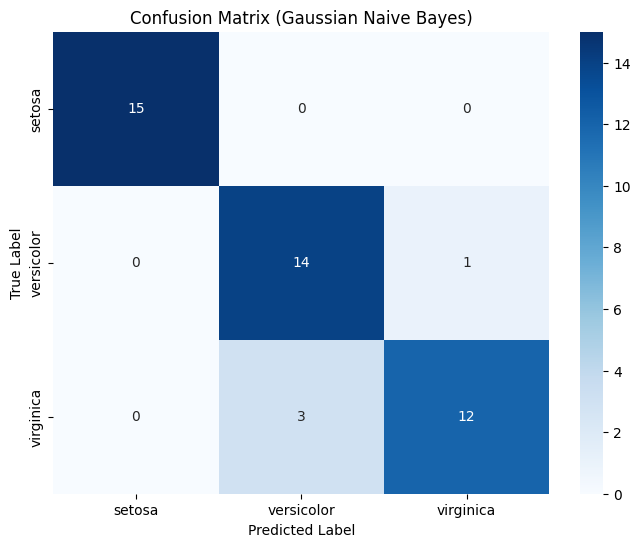

In [ ]:
# 5. Make predictions and evaluate
y_pred_gnb = gnb_model.predict(X_test_iris_scaled)
y_proba_gnb = gnb_model.predict_proba(X_test_iris_scaled)

print(f"\nAccuracy Score (GaussianNB): {accuracy_score(y_test_iris, y_pred_gnb):.4f}")
print("\nClassification Report (GaussianNB):")
print(classification_report(y_test_iris, y_pred_gnb, target_names=iris_target_names))

# Confusion Matrix
cm_gnb = confusion_matrix(y_test_iris, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris_target_names, yticklabels=iris_target_names)
plt.title('Confusion Matrix (Gaussian Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Examine learned parameters (mean and variance per class per feature)
print("\n--- Learned Parameters of GaussianNB ---")
print("Class Priors (P(y)):", gnb_model.class_prior_)
print("Class Means (Mean of features per class):\n", gnb_model.theta_)
print("Class Variances (Variance of features per class):\n", gnb_model.var_)


--- Learned Parameters of GaussianNB ---
Class Priors (P(y)): [0.33333333 0.33333333 0.33333333]
Class Means (Mean of features per class):
 [[-1.03020449  0.81419604 -1.29484676 -1.24795487]
 [ 0.08760619 -0.71163664  0.2547855   0.13291827]
 [ 0.94259829 -0.1025594   1.04006125  1.1150366 ]]
Class Variances (Variance of features per class):
 [[0.14005086 0.83996741 0.00727631 0.01545886]
 [0.32645331 0.41335985 0.06708186 0.05951797]
 [0.57600815 0.5668124  0.10237066 0.10665794]]


**Discussion Point:**
* Gaussian Naive Bayes assumes features are normally distributed. How might violations of this assumption impact its performance?
* Examine the `class_prior_`, `theta_`, and `var_` attributes of the trained `gnb_model`. What information do these attributes store, and how are they used for prediction according to Bayes' Theorem?


### Part 2: Multinomial Naive Bayes on Text Data

Multinomial Naive Bayes is particularly well-suited for discrete data, especially in text classification where features represent counts (e.g., word frequencies). We'll use a subset of the 20 Newsgroups dataset.

**Tasks:**
* Load a subset of the 20 Newsgroups dataset.
* Preprocess the text data (e.g., convert to lowercase, remove stopwords, potentially stemming/lemmatization).
* Convert text documents into numerical feature vectors using `CountVectorizer`.
* Train a `MultinomialNB` classifier.
* Evaluate its performance.
* Discuss the concept of Laplace smoothing in `MultinomialNB`.

In [ ]:
# 1. Load a subset of the 20 Newsgroups dataset
# We'll choose a few categories to keep it manageable
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_data = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)

X_text = newsgroups_data.data
y_text = newsgroups_data.target
text_target_names = newsgroups_data.target_names

print(f"Newsgroups dataset size: {len(X_text)} documents")
print(f"Newsgroups target classes: {text_target_names}")
print(f"\nExample document (first 200 chars):\n{X_text[0][:200]}...")
print(f"Corresponding class: {text_target_names[y_text[0]]}")

Newsgroups dataset size: 3759 documents
Newsgroups target classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

Example document (first 200 chars):
From: geb@cs.pitt.edu (Gordon Banks)
Subject: Re: "CAN'T BREATHE"
Article-I.D.: pitt.19440
Reply-To: geb@cs.pitt.edu (Gordon Banks)
Organization: Univ. of Pittsburgh Computer Science
Lines: 23

In art...
Corresponding class: sci.med


In [ ]:
# 2. Preprocess text data
# A simple preprocessing function
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower() # Lowercase
    # Remove punctuation, numbers (optional for simple example)
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    words = text.split()
    words = [word for word in words if word not in stop_words] # Remove stopwords
    words = [stemmer.stem(word) for word in words] # Stemming (optional)
    return ' '.join(words)

# Apply preprocessing to all documents
X_text_preprocessed = [preprocess_text(doc) for doc in X_text]
print(f"\nExample preprocessed document (first 200 chars):\n{X_text_preprocessed[0][:200]}...")

# 3. Convert text documents into numerical feature vectors using CountVectorizer
# CountVectorizer converts a collection of text documents to a matrix of token counts.
# This is ideal for Multinomial Naive Bayes.
vectorizer = CountVectorizer()
X_text_features = vectorizer.fit_transform(X_text_preprocessed)

print(f"\nText features matrix shape: {X_text_features.shape} (documents x vocabulary size)")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")


Example preprocessed document (first 200 chars):
gebcspittedu gordon bank subject cant breath articleid pitt replyto gebcspittedu gordon bank organ univ pittsburgh comput scienc line articl martijcuucp pjstijcuucp paul schmidt write think import ver...

Text features matrix shape: (3759, 35583) (documents x vocabulary size)
Vocabulary size: 35583


In [ ]:
# 4. Split data
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text_features, y_text, test_size=0.3, random_state=42, stratify=y_text
)

print(f"\nTraining text features shape: {X_train_text.shape}")
print(f"Testing text features shape: {X_test_text.shape}")


Training text features shape: (2631, 35583)
Testing text features shape: (1128, 35583)


In [ ]:
# 5. Train a Multinomial Naive Bayes classifier
# alpha is the Laplace/Lidstone smoothing parameter (default=1.0 for Laplace smoothing)
mnb_model = MultinomialNB(alpha=1.0) # Default alpha=1.0 applies Laplace smoothing
mnb_model.fit(X_train_text, y_train_text)

print("\nMultinomial Naive Bayes model trained.")


Multinomial Naive Bayes model trained.



Accuracy Score (MultinomialNB): 0.9619

Classification Report (MultinomialNB):
                        precision    recall  f1-score   support

           alt.atheism       0.96      0.94      0.95       240
         comp.graphics       0.99      0.96      0.98       292
               sci.med       0.95      0.99      0.97       297
soc.religion.christian       0.95      0.95      0.95       299

              accuracy                           0.96      1128
             macro avg       0.96      0.96      0.96      1128
          weighted avg       0.96      0.96      0.96      1128



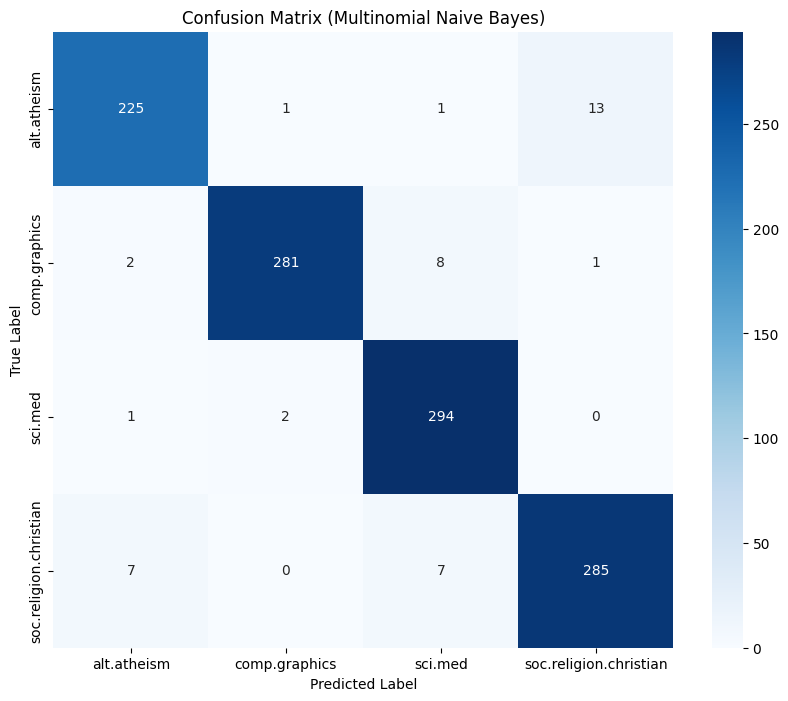

In [ ]:
# 6. Make predictions and evaluate
y_pred_mnb = mnb_model.predict(X_test_text)
y_proba_mnb = mnb_model.predict_proba(X_test_text)

print(f"\nAccuracy Score (MultinomialNB): {accuracy_score(y_test_text, y_pred_mnb):.4f}")
print("\nClassification Report (MultinomialNB):")
print(classification_report(y_test_text, y_pred_mnb, target_names=text_target_names))

# Confusion Matrix
cm_mnb = confusion_matrix(y_test_text, y_pred_mnb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=text_target_names, yticklabels=text_target_names)
plt.title('Confusion Matrix (Multinomial Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Examine learned parameters
print("\n--- Learned Parameters of MultinomialNB ---")
print("Class Priors (P(y)):", np.exp(mnb_model.class_log_prior_)) # Corrected attribute name and converted from log probability
# log_prob_features is log(P(xi|y))
print("Log Probabilities of features given class (first 5 features):\n", mnb_model.feature_log_prob_[:, :5])


--- Learned Parameters of MultinomialNB ---
Class Priors (P(y)): [0.21246674 0.25883694 0.26339795 0.26529837]
Log Probabilities of features given class (first 5 features):
 [[ -8.50599223 -11.76408877 -11.07094159 -11.76408877 -11.76408877]
 [-10.22964246 -10.74046809 -11.83908037 -10.74046809 -11.83908037]
 [-11.91299605 -11.91299605 -11.91299605 -10.81438376 -11.21984887]
 [ -9.72637441 -12.0289595  -12.0289595  -12.0289595  -12.0289595 ]]


**Discussion Points:**
* What is the "zero-frequency problem" in Naive Bayes, and how does Laplace smoothing (`alpha` parameter in `MultinomialNB`) address it?
* When would you choose `CountVectorizer` over `TfidfVectorizer` for text classification with Multinomial Naive Bayes?
* How does the performance of Multinomial Naive Bayes on text data compare to Gaussian Naive Bayes on numerical data, considering the nature of the features?


### Part 3: Bernoulli Naive Bayes

Bernoulli Naive Bayes is designed for binary/boolean features. It assumes features are independent binary variables (presence or absence of a word/feature), unlike Multinomial Naive Bayes which handles counts.

**Tasks:**
* Reuse the preprocessed text data (`X_text_preprocessed`).
* Convert text documents into binary feature vectors using `CountVectorizer` with `binary=True` (or `TfidfVectorizer` with `binary=True`).
* Train a `BernoulliNB` classifier.
* Evaluate its performance and compare with `MultinomialNB`.

In [ ]:
# 1. Convert text documents into binary feature vectors
# Use CountVectorizer with binary=True to represent presence/absence of words
vectorizer_binary = CountVectorizer(binary=True)
X_text_binary_features = vectorizer_binary.fit_transform(X_text_preprocessed)

print(f"Binary text features matrix shape: {X_text_binary_features.shape}")

Binary text features matrix shape: (3759, 35583)


In [ ]:
# 2. Split data (using the same split strategy as before for consistency)
X_train_text_bin, X_test_text_bin, y_train_text_bin, y_test_text_bin = train_test_split(
    X_text_binary_features, y_text, test_size=0.3, random_state=42, stratify=y_text
)

print(f"\nTraining binary text features shape: {X_train_text_bin.shape}")
print(f"Testing binary text features shape: {X_test_text_bin.shape}")


Training binary text features shape: (2631, 35583)
Testing binary text features shape: (1128, 35583)


In [ ]:
# 3. Train a Bernoulli Naive Bayes classifier
bnb_model = BernoulliNB(alpha=1.0) # Default alpha=1.0 for Laplace smoothing
bnb_model.fit(X_train_text_bin, y_train_text_bin)

print("\nBernoulli Naive Bayes model trained.")


Bernoulli Naive Bayes model trained.



Accuracy Score (BernoulliNB): 0.9122

Classification Report (BernoulliNB):
                        precision    recall  f1-score   support

           alt.atheism       1.00      0.88      0.93       240
         comp.graphics       0.79      0.98      0.88       292
               sci.med       0.98      0.88      0.93       297
soc.religion.christian       0.94      0.90      0.92       299

              accuracy                           0.91      1128
             macro avg       0.93      0.91      0.91      1128
          weighted avg       0.92      0.91      0.91      1128



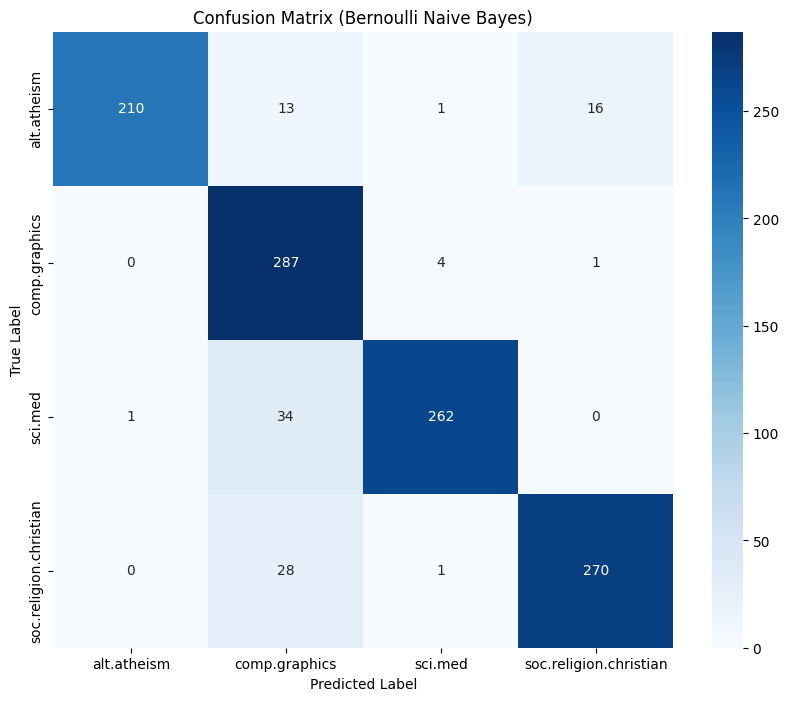

In [ ]:
# 4. Make predictions and evaluate
y_pred_bnb = bnb_model.predict(X_test_text_bin)
y_proba_bnb = bnb_model.predict_proba(X_test_text_bin)

print(f"\nAccuracy Score (BernoulliNB): {accuracy_score(y_test_text_bin, y_pred_bnb):.4f}")
print("\nClassification Report (BernoulliNB):")
print(classification_report(y_test_text_bin, y_pred_bnb, target_names=text_target_names))

# Confusion Matrix
cm_bnb = confusion_matrix(y_test_text_bin, y_pred_bnb)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_bnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=text_target_names, yticklabels=text_target_names)
plt.title('Confusion Matrix (Bernoulli Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Discussion Points:**
* What is the key difference in how `MultinomialNB` and `BernoulliNB` handle text features? When would you prefer one over the other?
* Compare the performance metrics (accuracy, precision, recall, f1-score) of `MultinomialNB` and `BernoulliNB` on this text dataset. Which one performed better and why do you think that might be the case?

### Part 4: Advanced Topics & Discussion:

**Discussion Topics:**
- **The "Naive" Assumption in Practice:** Discuss why the strong independence assumption, despite often being violated, allows Naive Bayes to perform well.
- **Laplace Smoothing (Detailed):** Provide a more in-depth explanation of Laplace smoothing and its variants.
- **Handling Continuous and Categorical Features Together:** How can Naive Bayes be extended to datasets with a mix of continuous and categorical features?
- **Comparison with other Classifiers:** Briefly compare Naive Bayes to Logistic Regression and Decision Trees in terms of assumptions, interpretability, and typical performance.
- **Strengths and Weaknesses Summarized:** Summarize the main advantages and disadvantages of Naive Bayes.

---

### The "Naive" Assumption in Practice:

The "naive" assumption of conditional independence between features, given the class, is almost always violated in real-world data. For instance, in an email, the words "free" and "money" are highly correlated if the email is spam. However, Naive Bayes often performs surprisingly well despite this violation. Reasons include:

- **Focus on Classification, Not Probability Estimation:**  
  While the probability estimates $ P(y \mid x_1, \ldots, x_n) $ might be inaccurate, the *ranking* of probabilities for different classes often remains correct. The classifier is interested in:

  $$
  \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)
  $$

  Even if the individual \( P(x_i \mid y) \) terms are slightly off, their product might still lead to the correct class prediction.

- **Computational Efficiency:**  
  The independence assumption makes Naive Bayes extremely fast to train and predict, especially for high-dimensional data (like text).

- **Robustness to Irrelevant Features:**  
  If a feature is irrelevant, then \( P(x_i \mid y) \) will be roughly the same across all classes. This minimizes its influence in classification.

- **Effective for Linearly Separable Problems:**  
  Naive Bayes can perform well when the data is (or becomes) linearly separable.



### Laplace Smoothing (Detailed):

The **Zero-Frequency Problem** occurs when a feature value (e.g., a word) doesn’t appear in the training data for a class. This makes:

$$
P(x_i \mid y) = 0
$$

Which causes the entire posterior:

$$
P(y) \prod P(x_i \mid y) = 0
$$

even if other features are strong indicators.

#### Laplace Smoothing (Additive Smoothing):

This adds a small constant \( \alpha \) (typically 1) to every count.

**Formula (Multinomial NB):**

$$
P(x_i \mid y) = \frac{\text{count}(x_i, y) + \alpha}{\text{count}(y) + \alpha \cdot \text{vocabulary\_size}}
$$

Where:
- $ \text{count}(x_i, y) $: count of feature \( x_i \) in class \( y \)
- $ \text{count}(y) $: total number of features in class \( y \)
- $ \alpha $: smoothing constant (1 = Laplace, <1 = Lidstone)
- $ \text{vocabulary\_size} $: number of unique features

**Effect:** Ensures no zero probabilities and assigns a small likelihood to unseen combinations.



### Handling Continuous and Categorical Features Together:

Naive Bayes models:
- `GaussianNB`: for **continuous** features
- `MultinomialNB`: for **categorical** features with counts
- `BernoulliNB`: for **binary** features

#### Mixed Naive Bayes:
To handle mixed types:
- Use `GaussianNB` for continuous features.
- Use `MultinomialNB` or `BernoulliNB` for categorical features.

**Implementation:**
- Train each model separately on its respective feature subset.
- During prediction:
  - Compute log-likelihoods from each sub-model.
  - Sum log-probabilities.
  - Apply softmax (or exponentiate and normalize) to get final class probabilities.

Note: `scikit-learn` doesn't provide this directly—you must build a custom pipeline.



###  Comparison with Other Classifiers:

#### vs. Logistic Regression:
- **Assumptions:**
  - NB: feature independence
  - LR: linear relationship between features and log-odds
- **Type:**
  - NB: **Generative**, models $ P(X \mid y) $
  - LR: **Discriminative**, models $ P(y \mid X) $
- **Interpretability:** Both interpretable; LR's coefficients are more intuitive.
- **Performance:** LR often better with enough data and feature interactions; NB better for small or sparse data.

#### vs. Decision Trees:
- **Assumptions:**
  - NB: strong independence assumption
  - Trees: non-parametric, no assumption
- **Interpretability:** Trees are highly visual and interpretable.
- **Performance:** Trees can overfit; NB is more robust but less flexible.



###  Strengths and Weaknesses Summarized:

#### Strengths:
- Simple and fast
- Scalable to large/high-dimensional data
- Good baseline model
- Works well with limited data
- Robust to irrelevant features

#### Weaknesses:
- Strong independence assumption
- Zero-frequency problem (needs smoothing)
- Requires feature-type-specific variants
- Poorly calibrated probabilities (overconfident)

---
  
<center>

<span style="color:#1f4e79">

Prepared By

**<span style="font-size:1.5em">Md. Atikuzzaman</span>**  
Lecturer  
Department of Computer Science and Engineering  
Green University of Bangladesh  
Email: atik@cse.green.edu.bd  

</span>
</center>

---
